# Homework 3 (100 points)

The goal of this homework is to practice techniques relating to SVD.

## Exercise 1 (65 points)

a) Fetch the "mnist_784" data and store is as a `.csv` (that way you don't have to fetch it every time - which takes about 30s). (4 points)

In [2]:
import numpy as np
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
print("Start Fetch")
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=True)

X.to_csv("data.csv", sep=',', encoding='utf-8')
y.to_csv("labels.csv", sep=',', encoding='utf-8')

print("Fetch and save Done")

Start Fetch
Fetch and save Done


In [4]:
data = X
#print(X)
#print(y)

b) Plot the singular value plot for a single example of the 0 digit (5 points)

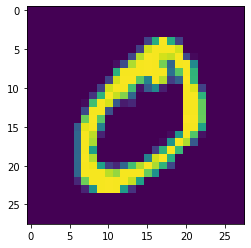

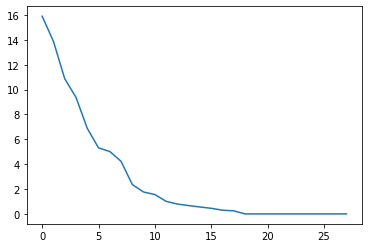

In [6]:
zero_image=X.iloc[[1]]
plt.imshow(zero_image.to_numpy().reshape(28,28))


zero_mat = zero_image.to_numpy().reshape(28,28)
#print(zero_mat)

zero_mat_scaled= (zero_mat-zero_mat.mean())/zero_mat.std()
u, s, v = np.linalg.svd(zero_mat_scaled, full_matrices=True) 
fig = plt.figure()
ax = plt.axes()
ax.plot(s)

c) By setting some singular values to 0, plot the approximation of the 0 digit next to the original digit. (5 points)

 Original Image  Approx(full rank) Approx(rank 10)


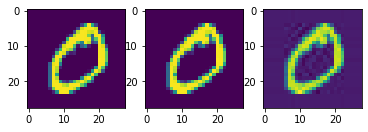

In [9]:
import matplotlib.pyplot as plt
s_copy = s
#print(s_copy)
#print(s_copy.size)
print(' Original Image  Approx(full rank) Approx(rank 10)')

plt.subplot(1,3,1)
plt.imshow(zero_image.to_numpy().reshape(28,28))

plt.subplot(1,3,2)
approx = np.matrix(u[:, :-1]) * np.diag(s_copy[:-1]) * np.matrix(v[:-1, :])
plt.imshow(approx);

s_copy[10:]=0

plt.subplot(1,3,3)
approx = np.matrix(u[:, :-1]) * np.diag(s_copy[:-1]) * np.matrix(v[:-1, :])
plt.imshow(approx);

#print(s_copy)

d) Consider the entire dataset as a matrix. Perform SVD and store the dataset approximation in a new `.csv` file. Explain why / how you chose a particular rank. (10 points)

In [10]:
print("Start SVD on Dataset")
data_mat = X.to_numpy()
data_mat_scaled= (data_mat-data_mat.mean())/data_mat.std()
u, s, v = np.linalg.svd(data_mat_scaled, full_matrices=False)
# copy over to keep original data untouched
u_cop = u
s_cop = s
v_cop = v

# replace all but first 10 values with zeroes
u_cop[10:]=0
s_cop[10:]=0
v_cop[10:]=0

df_u = pd.DataFrame(u_cop)
df_s = pd.DataFrame(s_cop)
df_v = pd.DataFrame(v_cop)

df_u.to_csv("SVD_U.csv", sep=',', encoding='utf-8')
df_s.to_csv("SVD_S.csv", sep=',', encoding='utf-8')
df_v.to_csv("SCD_V.csv", sep=',', encoding='utf-8')

print("SVD and save Dataset done ")

Start SVD on Dataset
SVD and save Dataset done 


In [11]:
#print(df_u)
#print()
#print()
#print(df_s)
#print()
#print()
#print(df_v)

Note: I read a piazza post confirming that it was ok to use full_matrices = False when running SVD. This allows the operation to be completed much faster than with full_matrices = True.

For rank, I tried to choose a value that allowed the resolution and detail of the images to remain reasonably high while dramatically reducing the overall size of the dataset. The value that best fit these criteria turned out to be around 10 in this case 

e) As in homework 2, using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. (10 points)

starting Kmeans
Kmeans done


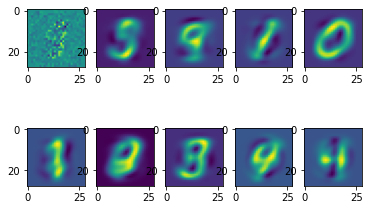

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# reconstruct based 
reconstruct = np.matrix(u_cop[:, :-1]) * np.diag(s_cop[:-1]) * np.matrix(v_cop[:-1, :])
data_df= pd.DataFrame(reconstruct)
print("starting Kmeans")
data_svd = data_df.values 
kmeans_img = KMeans(10).fit(data_svd)
centroids = kmeans_img.cluster_centers_
print("Kmeans done")

## Plotting ##
f,ax = plt.subplots(2,5)

n = 0
for i in range(5):
    ax[0][i].imshow(centroids[n].reshape([28,28]))  
    n+=1
    
m=5
for j in range(5):
    ax[1][j].imshow(centroids[m].reshape([28,28]))
    m+=1
    


f) Repeat e) on the original dataset. Comment on any differences (or lack thereof) you observe. (8 points)

starting Kmeans
Kmeans done


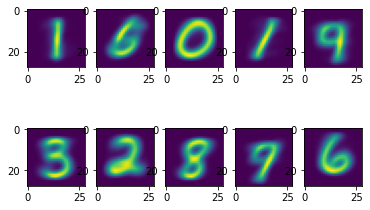

In [13]:
df_og= pd.DataFrame(X)
print("starting Kmeans")
data_og = df_og.values 
kmeans_img_og = KMeans(10).fit(data_og)
centroids_og = kmeans_img_og.cluster_centers_
print("Kmeans done")

## Plotting ##
f,ax = plt.subplots(2,5)

n = 0
for i in range(5):
    ax[0][i].imshow(centroids_og[n].reshape([28,28]))  
    n+=1
    
m=5
for j in range(5):
    ax[1][j].imshow(centroids_og[m].reshape([28,28]))
    m+=1
    

Both K means clusterings look vaguely similar, although the clustering on the SVD 
recontstruction is far less clear than the k means clustering done on the original dataset.
this makes sense because the SVD rank 10 reduces the total amount of data, making the dataset easier to handle, at the cost of clarity/resulution. Of particular note though is the first centroid in the K means clustering of the SVD reconstruction, which appears to have lost significantly more clarity than the others, and is more or less unreadable, whereas the rest of the plotted centroids in the SVD dataset are much closer to being legible. Higher rank of the dataset might improve the clarity and resolution of the SVD clustering, but would also increase the amount of time needed to perform operations on the dataset since the dataset would be significantly larger.

*Note- I asked about this on piazza and was told it was fine and not indicative of an issue with my code

g) Compare the disagreement distance of the clustering obtained in e) to the true labels, to the disagreement distance of the clustering obtained in f) to the true labels. Comment briefly. (8 points)

In [14]:
def disagreement_dist(P_labels, C_labels):
    xor_arr = np.logical_xor(P_labels, C_labels)
    xor_sum = xor_arr.astype(int).sum()
    return xor_sum

lbl_df = pd.DataFrame(y)
km_lbl_og = kmeans_img_og.labels_.astype(int)
km_lbl_e = kmeans_img.labels_.astype(int)
lbls = lbl_df.values.astype(int)

e = disagreement_dist(km_lbl_e,lbls)
f = disagreement_dist(km_lbl_og,lbls)

print("disagreement distance cluster SVD (E): ", e)
print("disagreement distance cluster original data (F): ", f)
print("overall difference: ", abs( e - f))

disagreement distance cluster SVD (E):  4416228060
disagreement distance cluster original data (F):  857349652
overall difference:  3558878408


The disagreement distance between the real labels and the the SVD cluster is much larger than the disagreement distance between the real labels and the cluster based on the original, unmodified dataset. This is expected since the SVD clustering is based on a reduced amount of data, which will decrease the accuracy of the model, and therefore result in the greater discrepancy between predicted labels and real labels when compared to the model based on the full dataset.

h) Create a matrix that is the difference between the original dataset and the rank-10 approximation of the dataset. (10 points)

In [15]:
print("Start")
reconst = np.matrix(u_cop[:, :-1]) * np.diag(s_cop[:-1]) * np.matrix(v_cop[:-1, :])
df_original_data = pd.DataFrame(X)
df_SVD_data = pd.DataFrame(reconst)

orginal_data_mat = df_original_data.values
SVD_data_mat = df_SVD_data.values

diff_mat = abs(np.subtract(orginal_data_mat, SVD_data_mat))

#print(diff_mat)
#make matrix a df
#diff_df = pd.DataFrame(diff_mat)
#diff_df.to_csv("diff.csv", sep=',', encoding='utf-8')

print("Done")

Start
Done


i) The largest (using euclidean distance from the origin) rows of the matrix could be considered anomalous data points. Briefly explain why. Plot the 10 images responsible for the 10 largest rows. (5 points)

[41358 25285 59439 10259  5972 10203 25321 10283 10245 62462]


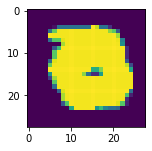

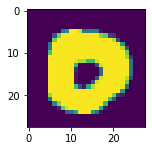

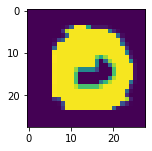

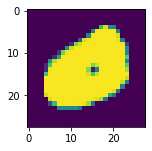

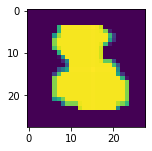

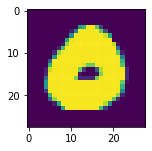

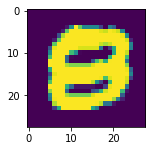

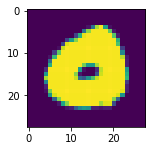

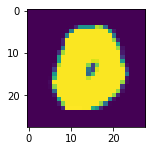

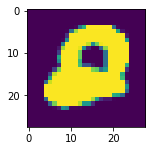

In [16]:
norm = np.linalg.norm(diff_mat, axis =1)
ind = (-norm).argsort()[:10]
print(ind)


i = 0
for index in ind:
    i+=1
    plt.figure(figsize=(25,25))
    plt.subplot(1,10, i)
    plt.imshow(X.iloc[[index]].to_numpy().reshape(28,28))

    


The largest rows in the matrix indicate the greatest difference between the SVD based model andd the full dataset based model. These points with large discrepancies indicate that the reduced dataset from SVD did a poor job of classifying these particular elements. This is an indication that the SVD reduced dataset caused the model to miss out on important pieces of data that would have aided in the classification of the images. These misclassified points with the largest disagreement distance can be considered outliers because they are not easily identifiable even with a reasonably good model (the SVD rank 10 model). 

## Exercise 2 (35 points)

a) Modify the code below to pick 4 categories of news articles that you think are minimally related (for example `sci.space` and `rec.sport.baseball`). (3 points)

In [17]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

categories = 'rec.autos', 'comp.graphics','rec.sport.hockey', 'talk.politics.guns'
#categories = 'rec.autos',
news_data = fetch_20newsgroups(subset='train', categories=categories)
#print(news_data)
print("Done")

Done


b) Using the `SnowballStemmer`, stem the words in every article (10 points)

In [18]:
#nltk.download('punkt')
#nltk.download('stopwords')
print("Start Stem")
stem_data = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)
                      for sent in sent_tokenize(message)
                      for word in word_tokenize(sent))
             for message in news_data.data]

print("Stem Done")

Start Stem
Stem Done


c) Use the `TfidfVectorizer` on the stemmed articles. Set `min_df` and `max_df` to reasonable numbers and briefly explain your reasoning. Store the resulting dataset into a `.csv` file. (7 points)

In [19]:
from scipy.sparse import csr_matrix
print("Part C start")
vect_ = TfidfVectorizer(stop_words = 'english', max_df = .8, min_df = .01)
tfidf = vect_.fit_transform(stem_data)
tfidf_df = pd.DataFrame(csr_matrix.todense(tfidf))
tfidf_df.to_csv("tfidf.csv", sep=',', encoding='utf-8')
terms = vect_.get_feature_names()
print("Part C done")

Part C start
Part C done


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


I chose the values for min and max df to be .8 and .01 respectively because i assume that if a word appears in more than 80% of the articles, then it is not specific to the subject being covered, and is most likely a "filler" word and therefore isn't interesting when analyzing the language being used in different categories of subjects. Inversely, if a word appeared in less than 1% of the articles, then maybe that word is something like a brand name or similar and should not be included in the analysis of english words. 

d) For rank k ranging from 1 to 25:

1. Reduce the dimensionality of the tfidf vectorized data using a dimension reduction technique discussed in class.
2. Apply Kmeans on the reduced dataset to create 4 clusters
3. Record the disagreement distance between the clustering in 2 and the article category

Then plot the recorded disagreement distance per rank. Comment briefly. (15 points)

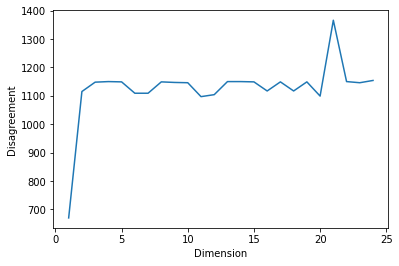

In [21]:
import warnings 
warnings.filterwarnings('ignore')

red = tfidf-np.mean(tfidf, axis =0)
u_d,s_d,v_d = np.linalg.svd(red)

#print(u_d.shape)
#print(s_d.shape)
#print(v_d.shape)

disagreement_distance = []
for k in range(1,25):
    dim_reduced_dataset = u_d[:,:k]@np.diag(s_d[:k])
    kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit_predict(dim_reduced_dataset)
    labelsk = kmeans.labels_
    disagreement_distance.append(disagreement_dist(labelsk, news_data.target))

plt.plot(range(1,25), disagreement_distance)
plt.ylabel('Disagreement')
plt.xlabel('Dimension')
plt.show()

Based on the graph, it appears that disagreement distance and dimention have an odd and somewhat unpredicatable relationship. I would have expected to see an overal trend that indicateed the higher the dimension, the lower the disagreement, since higher dimension includes more or the orignial data and should in theory produce a more accurate model at the expense of having to manipulate a greater amount of data. However, based on the graph, it seems like the lowest disagreement distance occurs around dimension = 6 and then spikes back upwards to higher levels of disagreement for higher dimensions. Perhaps this is unique to this particular dataset, which is not really related to one another, which causes some odd things to happen with the model. Interestingly, after approximately dimension =10, the disagreement distance remains the same until dimension =10, which proves that models including more dimensions are not always necessarily more accurate than models using fewer dimensions. in this case, a model using 11 dimensions would reduce the data set size considerably from a model using 25 dimensions, yet both would supposedly yield nearly identical results. 
